In [105]:
import osmnx as ox
import pandas as pd
import numpy as np
import networkx as nx
import os
import sys
import pickle
import seaborn as sns
import geopandas as gpd
import re

from descartes import PolygonPatch
from shapely.geometry import Polygon, MultiPolygon

from matplotlib import ticker
from matplotlib import cm
import matplotlib.pyplot as plt
import matplotlib.colors as colors

In [2]:
#ROOT_DIR = "/home/charles/Projects/QcMtlStreets"
#ROOT_DIR = "/home/dhw3172/projects/qcMtlStreets"
#ROOT_DIR = "/home/charles.gauvin/projects/qcMtlStreets"
sys.path.append(os.path.join("/home/charles.gauvin/projects/qcMtlStreets", "Python"))   
#os.chdir(ROOT_DIR)
 

In [3]:
from OsmnxElev import * 
print(ROOT_DIR)

/home/charles.gauvin/projects/qcMtlStreets/


In [6]:
os.path.isdir(os.path.join(ROOT_DIR,"Data","Pickle"))
os.path.isdir(os.path.join(ROOT_DIR))

True

In [8]:
filePathPickle=os.path.join(ROOT_DIR,"Data","Pickle", "graphElevationQc.pickle")
if os.path.isfile(filePathPickle):
    print("File exists => reading graph")
    pickle_inQc = open(filePathPickle,"rb")
    graphQcWithElevation = pickle.load(pickle_inQc)
else:
    print("File does not exists => calling google api")

File exists => reading graph


In [9]:
listNodeElevations=[dat["elevation"]  for n , dat in graphQcWithElevation.nodes(data=True) ] 

In [10]:
graphQcWithElevation = ox.add_edge_grades(graphQcWithElevation)

In [11]:
listEdgeGrades=[dat["grade"] for e1,e2, dat in graphQcWithElevation.edges(data=True) ]

In [12]:
normCol=colors.Normalize(vmin=np.min(listEdgeGrades), vmax=np.max(listEdgeGrades))
colMapGrades=cm.ScalarMappable(norm=normCol,cmap=cm.plasma)
colorEdges=[ colMapGrades.to_rgba(l) for l in listEdgeGrades ]

/anaconda/envs/py35/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


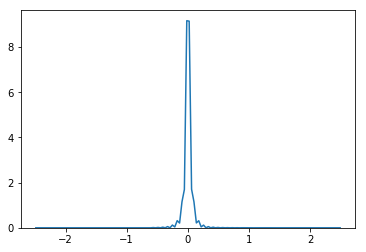

In [13]:
sns.kdeplot(listEdgeGrades)

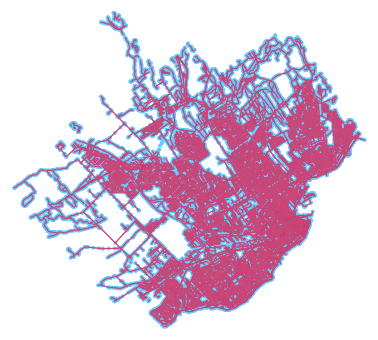

(<Figure size 706.136x432 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f8147d75710>)

In [23]:
ox.plot_graph(graphQcWithElevation ,
             edge_color=colorEdges)

In [4]:
graphQc=loadGraphElevGradesNeighQc()

File exists => reading graph


In [8]:
[dat for n,dat in graphQc.nodes(data=True)][:1]

[{'Neighbourhood': 'Quartier 5-4',
  'elevation': 59.754,
  'osmid': 2774269952,
  'x': -71.1842466,
  'y': 46.8669049}]

In [9]:
[dat for u,v,dat in graphQc.edges(data=True)][:1]

[{'access': 'private',
  'grade': -0.0212,
  'grade_abs': 0.0212,
  'highway': 'service',
  'length': 37.89,
  'oneway': False,
  'osmid': 272506619}]

In [18]:
re.match(".*Saint-J.*","Saint-Jean-Baptiste").group(0)

'Saint-Jean-Baptiste'

In [30]:
def getSafeNeigh(n,dat):
    try:
        neigh=dat["Neighbourhood"]
    except Exception as e:
        print("Fatal error at node " , n , dat , str(e))
        neigh=""
        
    return(neigh)

In [31]:
sjbNodes=[n for n, dat in graphQc.nodes.data() if re.match(".*Saint-J.*", getSafeNeigh(n,dat)) is not None ]

Fatal error at node  2282226165 {'osmid': 2282226165, 'y': 46.7878742, 'x': -71.2313785, 'elevation': 3.353} 'Neighbourhood'
Fatal error at node  2291673129 {'osmid': 2291673129, 'y': 46.755225, 'x': -71.271496, 'elevation': 4.386} 'Neighbourhood'
Fatal error at node  2814401556 {'osmid': 2814401556, 'y': 46.7504363, 'x': -71.371691, 'elevation': 72.87} 'Neighbourhood'
Fatal error at node  499688874 {'osmid': 499688874, 'y': 46.7892326, 'x': -71.3553865, 'elevation': 23.489} 'Neighbourhood'
Fatal error at node  300470082 {'osmid': 300470082, 'y': 46.749566, 'x': -71.3735532, 'elevation': 74.768} 'Neighbourhood'
Fatal error at node  300470085 {'osmid': 300470085, 'y': 46.7484191, 'x': -71.3767435, 'elevation': 76.294} 'Neighbourhood'
Fatal error at node  300470086 {'osmid': 300470086, 'y': 46.7485045, 'x': -71.3768157, 'elevation': 75.589} 'Neighbourhood'
Fatal error at node  300470387 {'osmid': 300470387, 'y': 46.736337, 'x': -71.3683826, 'elevation': 69.201} 'Neighbourhood'
Fatal erro

In [34]:
saintRochNodes=[n for n, dat in graphQc.nodes.data() if re.match(".*Saint-Roch.*", getSafeNeigh(n,dat)) is not None ]

Fatal error at node  2282226165 {'osmid': 2282226165, 'y': 46.7878742, 'x': -71.2313785, 'elevation': 3.353} 'Neighbourhood'
Fatal error at node  2291673129 {'osmid': 2291673129, 'y': 46.755225, 'x': -71.271496, 'elevation': 4.386} 'Neighbourhood'
Fatal error at node  2814401556 {'osmid': 2814401556, 'y': 46.7504363, 'x': -71.371691, 'elevation': 72.87} 'Neighbourhood'
Fatal error at node  499688874 {'osmid': 499688874, 'y': 46.7892326, 'x': -71.3553865, 'elevation': 23.489} 'Neighbourhood'
Fatal error at node  300470082 {'osmid': 300470082, 'y': 46.749566, 'x': -71.3735532, 'elevation': 74.768} 'Neighbourhood'
Fatal error at node  300470085 {'osmid': 300470085, 'y': 46.7484191, 'x': -71.3767435, 'elevation': 76.294} 'Neighbourhood'
Fatal error at node  300470086 {'osmid': 300470086, 'y': 46.7485045, 'x': -71.3768157, 'elevation': 75.589} 'Neighbourhood'
Fatal error at node  300470387 {'osmid': 300470387, 'y': 46.736337, 'x': -71.3683826, 'elevation': 69.201} 'Neighbourhood'
Fatal erro

In [104]:

shpQcCity = gpd.read_file(os.path.join(ROOT_DIR, "Data", "GeoData", "Neighbourhoods", "vdq-quartier.shp"))
listNeigh=["Saint-Jean-Baptiste","Saint-Roch"]
shpNeighFiltered=shpQcCity[np.isin(shpQcCity["NOM"], listNeigh)]
shpNeighFiltered
#dfPointsSubsetInPoly=getPointsInPoly(grapQc, shpNeighFiltered, listNeigh)

#setPointAllNeighbourhood(grapQc,
#                             dfPointsSubsetInPoly,
#                             shpNeighFiltered,
#                             "NOM")

    


ID                  NOM  SUPERFICIE  PERIMETRE  \
0    1  Saint-Jean-Baptiste   678906.19    3781.17   
29  30           Saint-Roch  1533882.10    6433.73   

                                             geometry  
0   POLYGON Z ((-71.21631942283598 46.812638240404...  
29  POLYGON Z ((-71.24009102868439 46.816725533432...

In [36]:
#fileNamePickleDump=os.path.join(ROOT_DIR, "Data", "Pickle", "graphElevationGradesNeighbourhoodsQc.pickle")
#with open( fileNamePickleDump, "wb") as f:
#    pickle.dumps(obj=grapQc, 
#                 file=fileNamePickleDump)

In [37]:
#dfPointsSubsetInPoly.head()

In [67]:
edgesCutSJBSaintRoch=nx.edge_boundary(graphQc, sjbNodes, saintRochNodes ) #returns a generator

In [68]:
listEdgesInCutSJBSaintRoch=[ e for e in edgesCutSJBSaintRoch] #watch out with the generators => not saved

In [69]:
listEdgesInCutSJBSaintRoch

[(164925596, 3960458872),
 (165224950, 5866614604),
 (4723196405, 275731864),
 (4772979548, 1400596012),
 (4772979574, 4772979575),
 (300461354, 366066696),
 (3422795423, 299835706)]

In [93]:
def getEdgeColor(u,v,cutList):
    for i in range(len(cutList)):
        if( (u==cutList[i][0]) & (v ==cutList[i][1])):
            col="red"
            break
        else:
            col="grey"
        
    return(col)

In [98]:
def getEdgeSize(u,v,cutList,defaultCol="grey"):
    if(getEdgeColor(u,v,cutList)==defaultCol):
        size=0
    else:
        size=2
        
    return(size)

In [99]:
ec=[ getEdgeColor(u,v,listEdgesInCutSJBSaintRoch) for u,v,dat in  graphQc.edges.data()  ]
es=[ getEdgeSize(u,v,listEdgesInCutSJBSaintRoch) for u,v,dat in  graphQc.edges.data()  ]

In [95]:
[i for i in ec if i == "red"]

['red', 'red', 'red', 'red', 'red', 'red', 'red']

In [100]:
[i for i in es if i == 2]

[2, 2, 2, 2, 2, 2, 2]

In [76]:
[(u,v) for u,v,dat in  graphQc.edges.data() if (u==listEdgesInCutSJBSaintRoch[1])  ]

[]

In [81]:
listEdgesInCutSJBSaintRoch[1][1]

5866614604

In [80]:
listEdgesInCutSJBSaintRoch[1][0]

165224950

In [85]:
dfEdgesInCutSJBSaintRoch = pd.DataFrame({"startNode" : [ listEdgesInCutSJBSaintRoch[i][0] for i in range(len(listEdgesInCutSJBSaintRoch))],
              "endNode" : [ listEdgesInCutSJBSaintRoch[i][1] for i in range(len(listEdgesInCutSJBSaintRoch))]
             }
            )

In [90]:
np.isin(listEdgesInCutSJBSaintRoch[1][1], dfEdgesInCutSJBSaintRoch.startNode).any()

False

In [89]:
np.isin(listEdgesInCutSJBSaintRoch[1][0], dfEdgesInCutSJBSaintRoch.startNode).any()

True

In [111]:
fig, ax = ox.plot_graph(graphQc,
             edge_color=ec,
             edge_linewidth=es,
             node_size=[0 for i in graphQc.nodes.data()],
             show=False,
             close=False           
                )
plt.close()

In [112]:
for idx, row in shpNeighFiltered.iterrows():
    patch=PolygonPatch( row["geometry"], alpha=0.1, zorder=-1)
    ax.add_patch(patch)

In [116]:
margin=0.2
west, south, east, north =shpNeighFiltered.unary_union.bounds
margin_ns = (north - south) * margin
margin_ew = (east - west) * margin
ax.set_ylim((south - margin_ns, north + margin_ns))
ax.set_xlim((west - margin_ew, east + margin_ew))

(-71.24581021192839, -71.20845254597562)

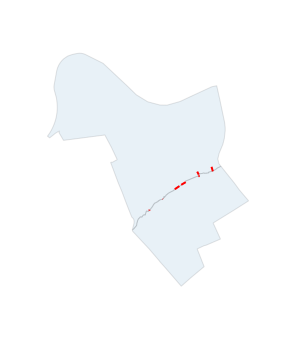

In [117]:
fig